### **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Num GPUs Available:  1


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
##pip install tensorflow==2.12.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/G - 7 /train.csv')

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

## Preprocessing of data

In [ ]:
!pip list

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer("Nice to meet you")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 520,    3, 1007, ...,    0,    0,    0])>

In [ ]:
vectorizer("Nice to meet you")[:4]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 520,    3, 1007,    7])>

In [ ]:
vectorizer_text = vectorizer(X.values)

In [ ]:
vectorizer_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
batch_X , batch_y = dataset.as_numpy_iterator().next()

In [ ]:
batch_X

array([[   23,     7,  5721, ...,     0,     0,     0],
       [ 4288,    61,    99, ...,     0,     0,     0],
       [   23,    48,    15, ...,     0,     0,     0],
       ...,
       [11366, 56237,     1, ...,     0,     0,     0],
       [92330,    16,  2949, ...,     0,     0,     0],
       [  425,   441,     8, ...,     0,     0,     0]])

In [ ]:
batch_y

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [ ]:
int(len(dataset)*.7)

6981

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
train_generator  = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[  288,   359,     5, ...,     0,     0,     0],
        [   23,    70,    15, ...,     0,     0,     0],
        [  165,    79,  7438, ...,     0,     0,     0],
        ...,
        [ 1456, 10980,    76, ...,     0,     0,     0],
        [ 1726,  6406, 10447, ...,     0,     0,     0],
        [  136,   166,     7, ...,     0,     0,     0]]),
 array([[1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

### Creating the sequentail model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()

In [ ]:
#Creating the embedding layers
model.add(Embedding(MAX_FEATURES+1,32))

In [ ]:
#creating the Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32,activation='tanh')))

In [ ]:
#creating the Feature extractor Fully conncected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

In [ ]:
#Final Layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history = model.fit(train, epochs=10, validation_data=val.acc)

Epoch 1/10
6981/6981 [==============================] - 793s 112ms/step - loss: 0.0644 - val_loss: 0.0501
Epoch 2/10
6981/6981 [==============================] - 647s 93ms/step - loss: 0.0460 - val_loss: 0.0403
Epoch 3/10
6981/6981 [==============================] - 637s 91ms/step - loss: 0.0409 - val_loss: 0.0361
Epoch 4/10
6981/6981 [==============================] - 640s 92ms/step - loss: 0.0365 - val_loss: 0.0319
Epoch 5/10
6981/6981 [==============================] - 640s 92ms/step - loss: 0.0327 - val_loss: 0.0288
Epoch 6/10
6981/6981 [==============================] - 638s 91ms/step - loss: 0.0292 - val_loss: 0.0240
Epoch 7/10
6981/6981 [==============================] - 641s 92ms/step - loss: 0.0261 - val_loss: 0.0231
Epoch 8/10
6981/6981 [==============================] - 626s 90ms/step - loss: 0.0236 - val_loss: 0.0184
Epoch 9/10
6981/6981 [==============================] - 643s 92ms/step - loss: 0.0202 - val_loss: 0.0174
Epoch 10/10
6981/6981 [==============================]

<Figure size 800x500 with 0 Axes>

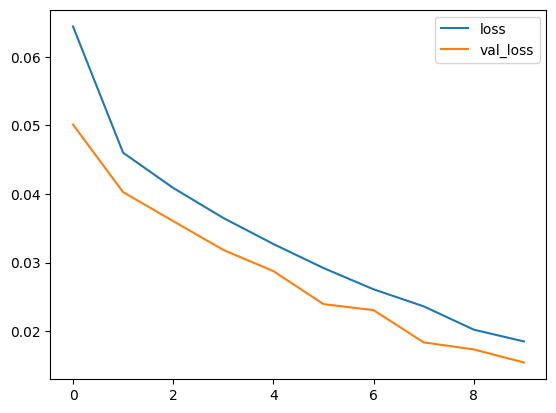

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

##Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [ ]:
model.predict(batch_X)

1/1 [==============================] - 5s 5s/step


array([[0.5013823 , 0.4983821 , 0.49908853, 0.50061095, 0.49969822,
        0.49914482],
       [0.5009312 , 0.4980877 , 0.49861673, 0.50264883, 0.49853292,
        0.4979341 ],
       [0.5014333 , 0.4980986 , 0.499519  , 0.5007038 , 0.49910858,
        0.49912202],
       [0.50077885, 0.4975616 , 0.49776563, 0.501458  , 0.4992659 ,
        0.49867234],
       [0.50072765, 0.4990159 , 0.49891397, 0.50072205, 0.49877942,
        0.4992989 ],
       [0.5009368 , 0.49944666, 0.4984899 , 0.5009902 , 0.49974716,
        0.50014913],
       [0.50110626, 0.49895826, 0.49893963, 0.5011913 , 0.4990339 ,
        0.49889025],
       [0.5007997 , 0.49885985, 0.49854252, 0.5011613 , 0.49899256,
        0.4996024 ],
       [0.50094885, 0.4982921 , 0.49917963, 0.50136846, 0.49898985,
        0.4985654 ],
       [0.5010687 , 0.49919176, 0.49821705, 0.50085396, 0.4996017 ,
        0.49963865],
       [0.50085944, 0.49758285, 0.4986884 , 0.50156283, 0.49904647,
        0.49916002],
       [0.5014241 , 0

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 63ms/step


array([[1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0]])

In [ ]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 94ms/step


In [ ]:
res

array([[0.5013823 , 0.4983821 , 0.49908853, 0.50061095, 0.49969822,
        0.49914482],
       [0.5009312 , 0.4980877 , 0.49861673, 0.50264883, 0.49853292,
        0.4979341 ],
       [0.5014333 , 0.4980986 , 0.499519  , 0.5007038 , 0.49910858,
        0.49912202],
       [0.50077885, 0.4975616 , 0.49776563, 0.501458  , 0.4992659 ,
        0.49867234],
       [0.50072765, 0.4990159 , 0.49891397, 0.50072205, 0.49877942,
        0.4992989 ],
       [0.5009368 , 0.49944666, 0.4984899 , 0.5009902 , 0.49974716,
        0.50014913],
       [0.50110626, 0.49895826, 0.49893963, 0.5011913 , 0.4990339 ,
        0.49889025],
       [0.5007997 , 0.49885985, 0.49854252, 0.5011613 , 0.49899256,
        0.4996024 ],
       [0.50094885, 0.4982921 , 0.49917963, 0.50136846, 0.49898985,
        0.4985654 ],
       [0.5010687 , 0.49919176, 0.49821705, 0.50085396, 0.4996017 ,
        0.49963865],
       [0.50085944, 0.49758285, 0.4986884 , 0.50156283, 0.49904647,
        0.49916002],
       [0.5014241 , 0

In [ ]:
##res.flatten()

In [ ]:
###Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 52ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.05537351965904236, Recall:0.6861035227775574, Accuracy:0.06519559025764465


In [ ]:
###Test and Gradio

In [ ]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7

In [ ]:
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/G - 7 /toxicity.h5')

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>